# INTRODUCTION

This project involves analysis of stock prices of major tech companies such as Apple, Amazon, IBM, facebook, Google, Netflix, Tesla and Microsoft using the Sharpe Ratio, also known as the sharpe index. The sharpe ratio as defined by William Sharpe, is the measure of risk-adjusted return of a financial portfolio. Higher the Sharpe ratio, superior the portfolio when compared to its peers' portfolios in the market. 

Before we start with the execution of this project, it is important to understand the meaning of holding a share of a company. What exactly is it?
    A share is sort of a piece of the company that anybody who choses to invest their money, can buy or sell for a price that is set at any particular time depending on how the stock markets' performance is. The basic idea in stock market investment is to invest in a share of the company, whos' value shall increase over time. 
    
Are there risks to buying shares? Certainly. The risk lies in the fact that the stock market is highly volatile and value of the shares that an individual holds, at any point of time may drop. The result of which, is a huge loss of money after years of investment. But, when investing in shares of prominent companies, the benefits may outweigh the risks, as an investor can potentially earn a great deal of money as returns, while making more than the amount one initially invested even after paying tax for the profits and divends. 

So how would one know which of these prominent companies he/she can invest in, so as to minimise the risk, while potentially earning good returns? Statistics is the answer. The decision to invest, should be driven by the analysis of historical data by calculating the risks and returns for that available data of each of the prominent companies within a given timeframe. 

The data for this particular project was obtained from Yahoo Finance, the link for which is provided below:
    https://finance.yahoo.com/

As mentioned before, the crux of this project revolves around the sharpe ratio as mentioned above, which is given by:

                                            Average Excess Returns
## Daily Sharpe Ratio = ------------------------------------------
                                        Standard Deviation of Excess Returns
                       
                            
## Annual Sharpe Ratio = Daily Sharpe Ratio * Annual Factor.

In [2]:
# Importing required modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Setting Directory
os.chdir('F:/Internship/Stock Data/')
print(os.getcwd())

# Settings to produce nice plots in Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
Apple = pd.read_csv('AAPL.csv', parse_dates = True, index_col = 'Date')
Amazon = pd.read_csv('AMZN.csv', parse_dates = True, index_col = 'Date')
Facebook = pd.read_csv('FB.csv', parse_dates = True, index_col = 'Date')
Google = pd.read_csv('GOOG.csv', parse_dates = True, index_col = 'Date')
IBMstock = pd.read_csv('IBM.csv', parse_dates = True, index_col = 'Date')
Microsoft = pd.read_csv('MSFT.csv', parse_dates = True, index_col = 'Date')
Netflix = pd.read_csv('NFLX.csv', parse_dates = True, index_col = 'Date')
Tesla = pd.read_csv('TSLA.csv', parse_dates = True, index_col = 'Date')
SnP500 = pd.read_csv('S&P500.csv', parse_dates = True, index_col = 'Date')

# Taking a look at the loaded datasets
print(Apple.head())
print(Amazon.head())
print(Facebook.head())
print(Google.head())
print(IBMstock.head())
print(Microsoft.head())
print(Netflix.head())
print(Tesla.head())
print(SnP500.head())

Apple.info()

F:\Internship\Stock Data
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-03-01  137.889999  140.149994  137.600006  139.789993  135.028976   
2017-03-02  140.000000  140.279999  138.759995  138.960007  134.227295   
2017-03-03  138.779999  139.830002  138.589996  139.779999  135.019348   
2017-03-06  139.369995  139.770004  138.600006  139.339996  134.594330   
2017-03-07  139.059998  139.979996  138.789993  139.520004  134.768204   

              Volume  
Date                  
2017-03-01  36414600  
2017-03-02  26211000  
2017-03-03  21108100  
2017-03-06  21750000  
2017-03-07  17446300  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-03-01  853.049988  854.830017  849.010010  853.080017  853.080017   
2017-03-02  853.080017  854.820007  847.280029  848.909973  848.909973   

## VISUAL EXPLORATORY DATA ANALYSIS

This is done to get a good understanding of how the value has traversed over the year [i.e., from 1st of March, 2017 to the 29th of March, 2018]. The following plots show the change in value over time with respect to each of the comapnies we are interested to invest in. 

Text(0.5,1,'AAPL Shares')

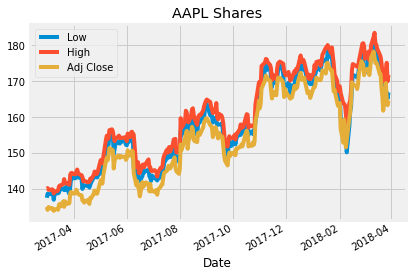

In [24]:
Apple['Low'].plot()
Apple['High'].plot()
Apple['Adj Close'].plot()
plt.legend()
plt.title('AAPL Shares')

Text(0.5,1,'AMZN Shares')

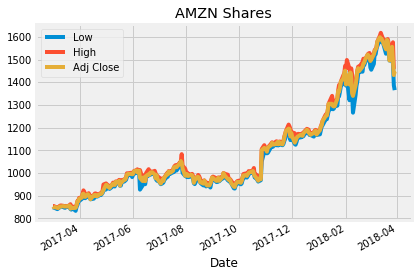

In [25]:
Amazon.Low.plot()
Amazon.High.plot()
Amazon['Adj Close'].plot()
plt.legend()
plt.title('AMZN Shares')

Text(0.5,1,'TSLA Shares')

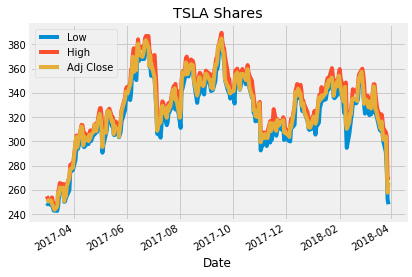

In [26]:
Tesla.Low.plot()
Tesla.High.plot()
Tesla['Adj Close'].plot()
plt.legend()
plt.title('TSLA Shares')

Text(0.5,1,'MSFT Shares')

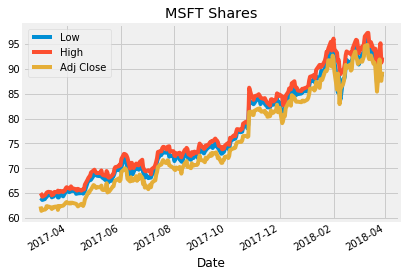

In [27]:
Microsoft.Low.plot()
Microsoft.High.plot()
Microsoft['Adj Close'].plot()
plt.legend()
plt.title('MSFT Shares')

Text(0.5,1,'NFLX Shares')

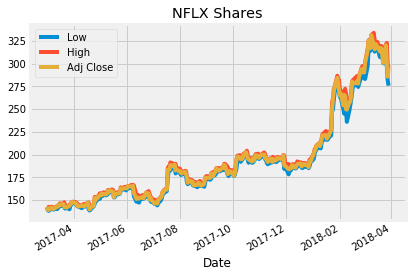

In [28]:
Netflix.Low.plot()
Netflix.High.plot()
Netflix['Adj Close'].plot()
plt.legend()
plt.title('NFLX Shares')

Text(0.5,1,'FB Shares')

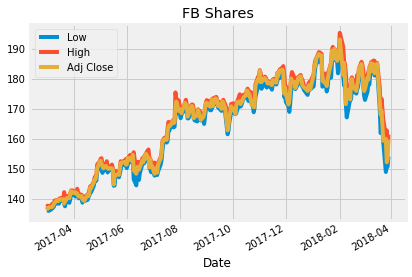

In [29]:
Facebook.Low.plot()
Facebook.High.plot()
Facebook['Adj Close'].plot()
plt.legend()
plt.title('FB Shares')

Text(0.5,1,'GOOG Shares')

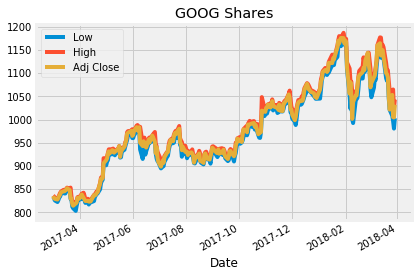

In [30]:
Google.Low.plot()
Google.High.plot()
Google['Adj Close'].plot()
plt.legend()
plt.title('GOOG Shares')

Text(0.5,1,'IBM Shares')

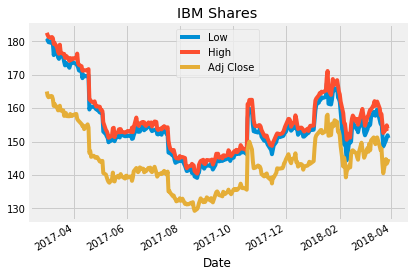

In [31]:
IBMstock.Low.plot()
IBMstock.High.plot()
IBMstock['Adj Close'].plot()
plt.legend()
plt.title('IBM Shares')

Text(0.5,1,'S&P 500 Shares')

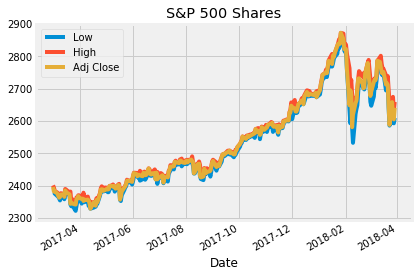

In [32]:
SnP500.Low.plot()
SnP500.High.plot()
SnP500['Adj Close'].plot()
plt.legend()
plt.title('S&P 500 Shares')

## EXTRACTING THE CLOSING VALUES 

The closing value is the final value of the companys' shares for that particular day just before the stock market closes or retires. Here, we select the closing values and store them in a dataframe named after the market representation of each of these companies, so that we can put them all together into a single dataframe later on.  

In [12]:
AAPL = pd.DataFrame(Apple['Adj Close'])
AAPL.columns = ['Apple']

AMZN = pd.DataFrame(Amazon['Adj Close'])
AMZN.columns = ['Amazon']

FB = pd.DataFrame(Facebook['Adj Close'])
FB.columns = ['facebook']

GOOG = pd.DataFrame(Google['Adj Close'])
GOOG.columns = ['Google']

IBM = pd.DataFrame(IBMstock['Adj Close'])
IBM.columns = ['IBM']

MSFT = pd.DataFrame(Microsoft['Adj Close'])
MSFT.columns = ['Microsoft']

NFLX = pd.DataFrame(Netflix['Adj Close'])
NFLX.columns = ['Netflix']

TSLA = pd.DataFrame(Tesla['Adj Close'])
TSLA.columns = ['Tesla']

## COMBINING STOCK DATA

The previously created pandas dataframes are now passed as a list to the pandas concat function in order to combine these into a single dataframe that we can operate on with ease rather than working on one dataframe at a time.

In [33]:
#list of dataframes 
frames = [AAPL, AMZN, FB, GOOG, IBM, MSFT, NFLX, TSLA]

#combining data across columns
Stock_Data = pd.concat(frames, axis = 1)

#Cleaning data by removing null values
Stock_Data.dropna()

#Checking for any leftover null values
Stock_Data.isna().sum()

Apple        0
Amazon       0
facebook     0
Google       0
IBM          0
Microsoft    0
Netflix      0
Tesla        0
dtype: int64

## BENCHMARK

As done previously for the stock data of companies individually, we repeat the process here for the S&P 500 data. The S&P 500, or just the S&P, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE, NASDAQ, or the Cboe BZX Exchange.

In [14]:
SP500 = pd.DataFrame(SnP500['Adj Close'])
SP500.columns = ['S&P 500']

SP500.dropna()
SP500.isna().sum()

S&P 500    0
dtype: int64

In [15]:
print('Stock Value \n')

#Exploring stock data
print(Stock_Data.info())
print(Stock_Data.head(n = 50))

print('\n')

print('Benchmark \n')

#Exploring benchamrk data
print(SP500.info())
print(SP500.head(n = 50))

Stock Value 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2017-03-01 to 2018-03-29
Data columns (total 8 columns):
Apple        273 non-null float64
Amazon       273 non-null float64
facebook     273 non-null float64
Google       273 non-null float64
IBM          273 non-null float64
Microsoft    273 non-null float64
Netflix      273 non-null float64
Tesla        273 non-null float64
dtypes: float64(8)
memory usage: 19.2 KB
None
                 Apple      Amazon    facebook      Google         IBM  \
Date                                                                     
2017-03-01  135.028976  853.080017  137.419998  835.239990  164.996353   
2017-03-02  134.227295  848.909973  136.759995  830.630005  163.708633   
2017-03-03  135.019348  849.880005  137.169998  829.080017  163.273376   
2017-03-06  134.594330  846.609985  137.419998  827.780029  163.654251   
2017-03-07  134.768204  846.020020  137.300003  831.909973  163.572601   
2017-03-08  134.265915  850

,Apple,Amazon,facebook,Google,IBM,Microsoft,Netflix,Tesla
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,154.616159,1092.390145,165.472930,978.135128,143.566688,75.198022,193.074212,326.821026
std,12.632273,206.245318,15.205829,91.983584,8.283395,9.725687,49.249499,30.269022
min,133.956802,843.200012,136.759995,814.429993,129.272202,61.428928,139.139999,243.690002
25%,143.326370,958.489990,151.059998,924.690002,138.203720,67.350113,157.020004,310.549988
50%,153.081329,995.890015,170.009995,964.859985,142.223587,72.007454,183.600006,328.980011
75%,167.185913,1179.140015,178.300003,1041.099976,147.885086,83.388779,199.179993,348.049988
max,178.307755,1598.390015,193.089996,1175.839966,164.996353,94.812752,331.440002,385.000000


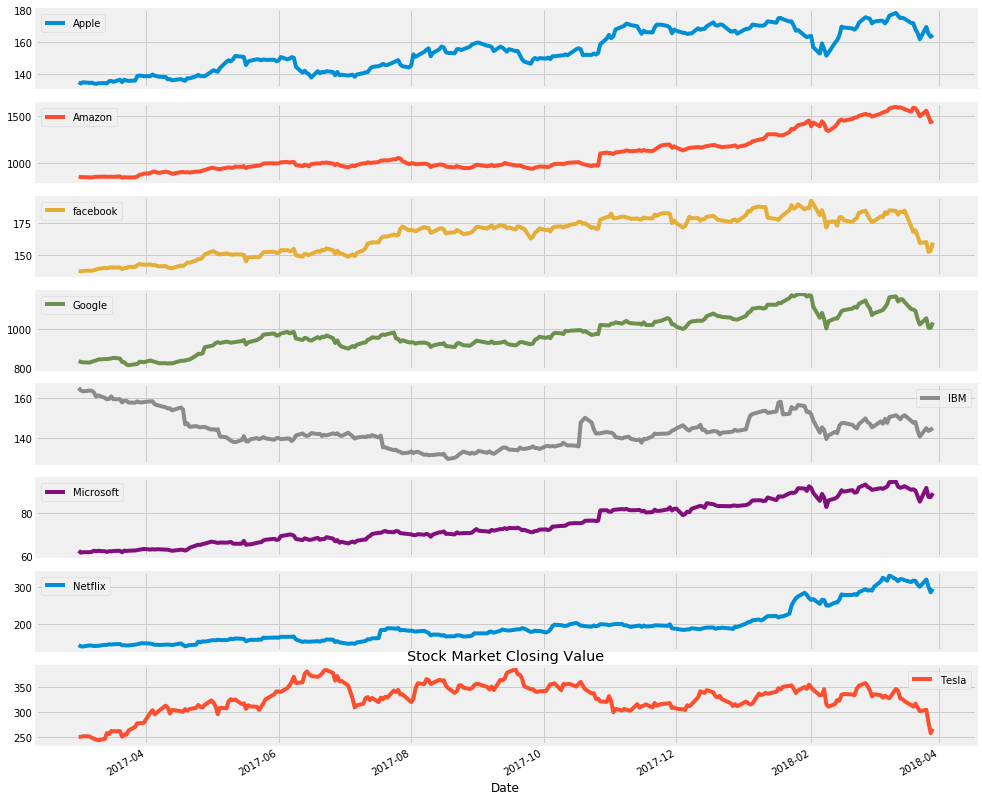

In [34]:
Stock_Data.plot(subplots = True, figsize=(15,15))

plt.title('Stock Market Closing Value')

#Checking statistical distribution of data
Stock_Data.describe()


,S&P 500
count,273.000000
mean,2533.661653
std,140.306802
min,2328.949951
25%,2425.179932
50%,2496.479980
75%,2648.939941
max,2872.870117


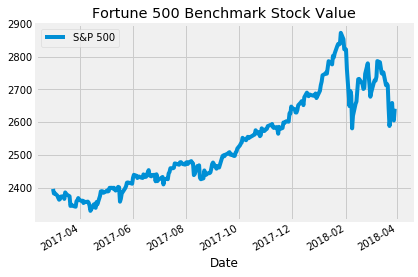

In [17]:
SP500.plot()
plt.title('Fortune 500 Benchmark Stock Value')

#Checking for statistical distribution of data
SP500.describe()

## Calculating the RETURN on Stock

This is done by using the pct_change function associated with the pandas dataframe. pct_change() function calculates the percentage change between the current and the previous element. 

,Apple,Amazon,facebook,Google,IBM,Microsoft,Netflix,Tesla
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.000808,0.002057,0.000657,0.000861,-0.000414,0.001409,0.002910,0.000514
std,0.012634,0.015133,0.014251,0.012904,0.011504,0.012787,0.021698,0.023844
min,-0.043390,-0.046782,-0.067697,-0.050454,-0.049162,-0.051334,-0.061370,-0.086290
25%,-0.004989,-0.004920,-0.004493,-0.004212,-0.005398,-0.003932,-0.007006,-0.012684
50%,0.000201,0.001704,0.001088,0.001691,0.000118,0.001277,0.001082,0.000604
75%,0.007166,0.009873,0.008242,0.007987,0.004421,0.007079,0.012871,0.015527
max,0.047472,0.132164,0.044174,0.048028,0.088645,0.075705,0.135436,0.072655


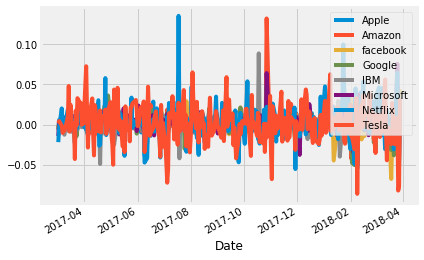

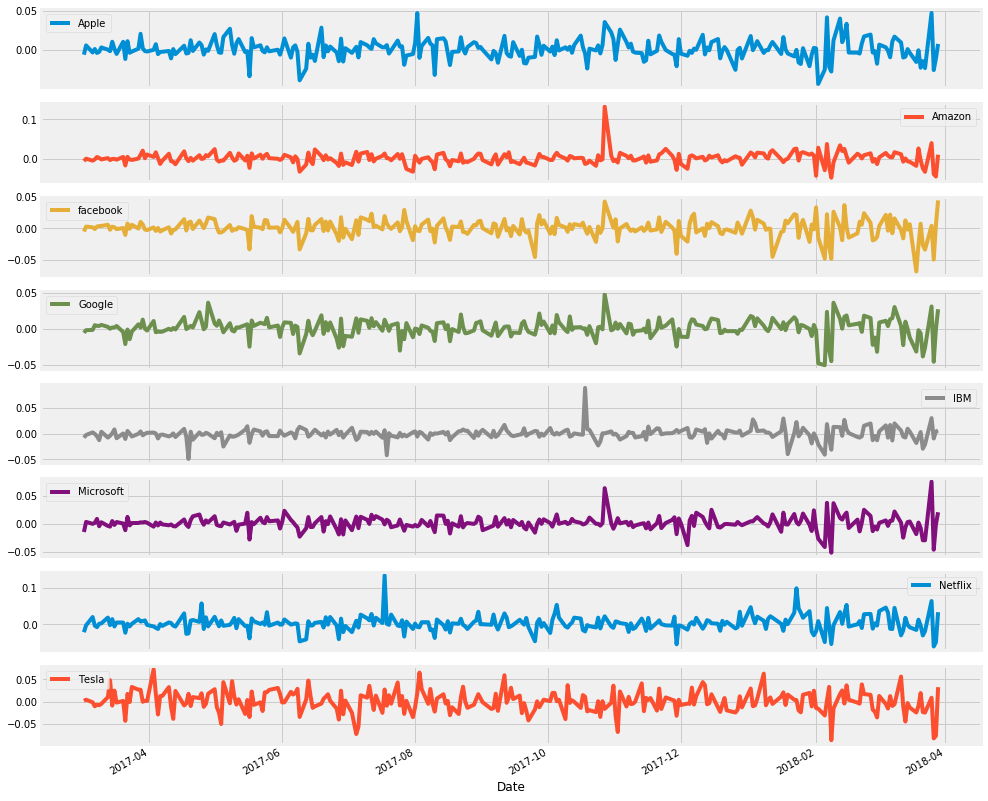

In [18]:
Stock_Returns = Stock_Data.pct_change()

#Checking for variations in returns
Stock_Returns.plot()

Stock_Returns.plot(subplots = True, figsize=(15,15))

#Statistical signinficance
Stock_Returns.describe()

## Calculating RETURN on Benchmark data

count    272.000000
mean       0.000382
std        0.006968
min       -0.040979
25%       -0.001631
50%        0.000556
75%        0.002933
max        0.027157
Name: S&P 500, dtype: float64

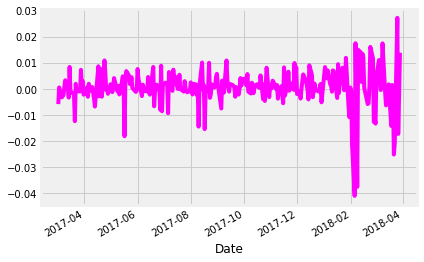

In [19]:
Benchmark_Returns = SP500['S&P 500'].pct_change()

Benchmark_Returns.plot(color = 'magenta')

Benchmark_Returns.describe()

## Calculating Excess RETURN

Excess Return is given by the difference between the return on stock and return on benchmark.

,Apple,Amazon,facebook,Google,IBM,Microsoft,Netflix,Tesla
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.000426,0.001675,0.000274,0.000478,-0.000796,0.001027,0.002528,0.000132
std,0.009561,0.012957,0.011324,0.008930,0.009923,0.008558,0.018873,0.022257
min,-0.037947,-0.041319,-0.053493,-0.033316,-0.047446,-0.036688,-0.055008,-0.073854
25%,-0.004424,-0.004677,-0.004150,-0.003822,-0.004851,-0.003194,-0.006667,-0.014182
50%,0.000085,0.000922,0.000781,0.000596,-0.000670,0.000425,0.000489,-0.000473
75%,0.005013,0.007596,0.005858,0.005555,0.003371,0.004798,0.011330,0.013045
max,0.046758,0.124091,0.034417,0.039955,0.087902,0.056046,0.134838,0.074298


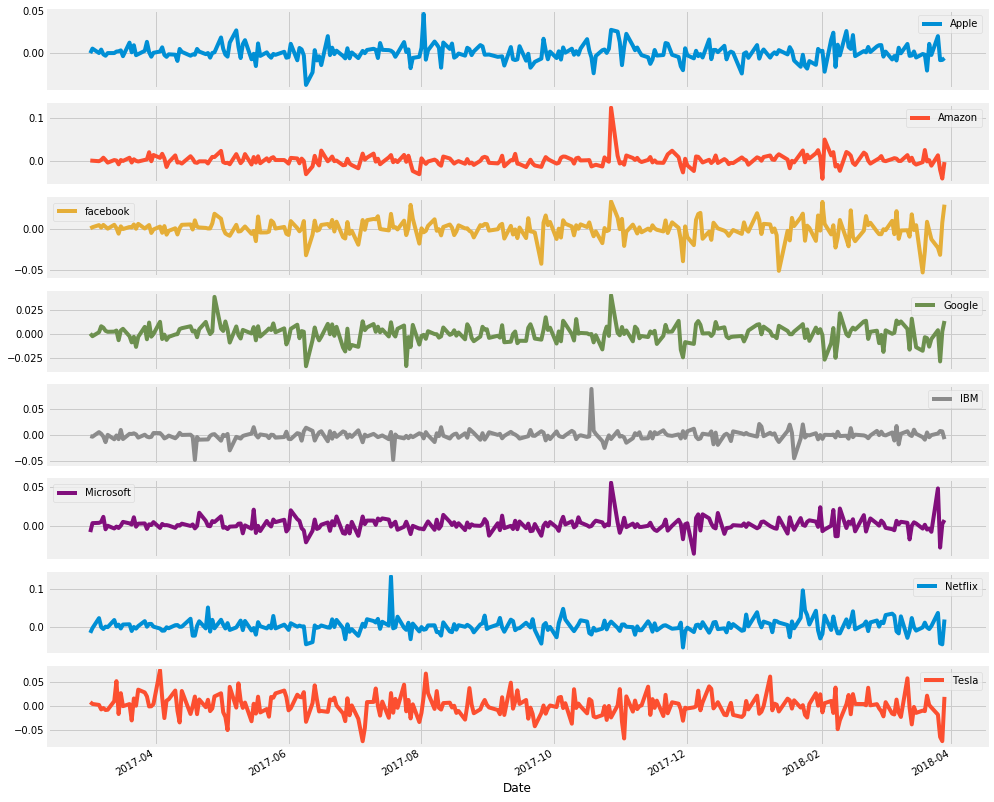

In [20]:
Excess_Returns = Stock_Returns.sub(Benchmark_Returns, axis = 0)

Excess_Returns.plot(subplots = True, figsize=(15,15))

Excess_Returns.describe()

## Calculating the mean Excess Return value

Text(0.5,1,' Return DIfference Average ')

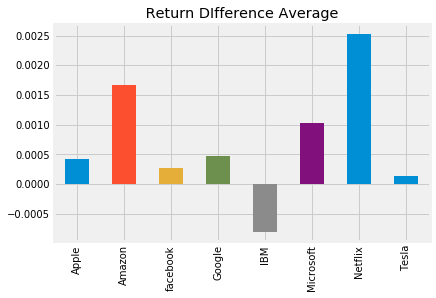

In [21]:
Avger = Excess_Returns.mean()

Avger.plot.bar()
plt.title(' Return DIfference Average ')

## Calculating Deviance 

Text(0.5,1,'Std Return Difference')

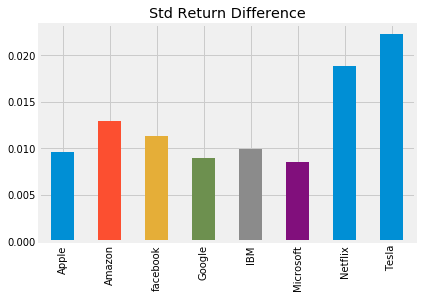

In [22]:
StdDever = Excess_Returns.std()

StdDever.plot.bar()

plt.title('Std Return Difference')

## DAILY & ANNUAL SHARPE RATIO 

Text(0.5,1,'Annual Sharpe Ratio : Stocks v/s S&P 500')

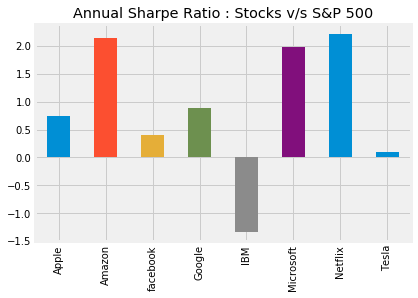

In [23]:
DSR = Avger.div(StdDever)

#the annual factor calculated as the length of the benchmark data
y_factor = np.sqrt(len(SP500))

ASR = DSR.mul(y_factor)

ASR.plot.bar()

plt.title('Annual Sharpe Ratio : Stocks v/s S&P 500')

Generally, a sharpe ratio of 3.0 or higher is considered to be excellent. But, surely that value for a sharpe ratio cannot be obtained at all times. And as we can observe from the above plot, Amazon, Netfix and Microsoft shares have a good score of around 2.0 while the rest only, barely, make it upto less than 1.0. As already mentioned before, the higher the sharpe ratio, better the investment. Hence, it is wise to have invested in Netflix, Amazon and Microsoft, in that order, for good returns over the year [03/01/2017 to 03/29/2018].